In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [2]:
# -------------------- Ayarlar --------------------
image_size = 32
num_classes = 43
base_dir = './dataset'  # tüm veriler bu klasörde
# -------------------- Eğitim Verilerini Yükle (klasör yapısından) --------------------
X = []
y = []

train_path = os.path.join(base_dir, 'Train')

for class_id in range(num_classes):
    class_dir = os.path.join(train_path, str(class_id))
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(class_id)
        except Exception as e:
            print(f"Hata {img_path} dosyasında: {e}")

X = np.array(X) / 255.0
y = to_categorical(np.array(y), num_classes)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# -------------------- Model --------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
early_stop = EarlyStopping(
    monitor='val_loss',      # Doğrulama kaybını izle
    patience=3,              # 3 epoch boyunca gelişme olmazsa durdur
    restore_best_weights=True # En iyi ağırlıkları geri yükle
)


In [5]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]  # <-- buraya eklendi
)
model.summary()

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.3494 - loss: 2.4656 - val_accuracy: 0.9082 - val_loss: 0.4104
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8669 - loss: 0.4548 - val_accuracy: 0.9668 - val_loss: 0.1493
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9375 - loss: 0.2205 - val_accuracy: 0.9793 - val_loss: 0.0990
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9589 - loss: 0.1477 - val_accuracy: 0.9832 - val_loss: 0.0707
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9670 - loss: 0.1147 - val_accuracy: 0.9828 - val_loss: 0.0654
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9738 - loss: 0.0869 - val_accuracy: 0.9883 - val_loss: 0.0536
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9801 - loss: 0.0702 - val_accuracy: 0.9907 - val_loss: 0.0455
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9831 - loss: 0.0600 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 959,939 (3.66 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 639,960 (2.44 MB)

In [6]:
print(f"Eğitim {len(history.history['loss'])} epoch'ta tamamlandı.")

Eğitim 15 epoch'ta tamamlandı.


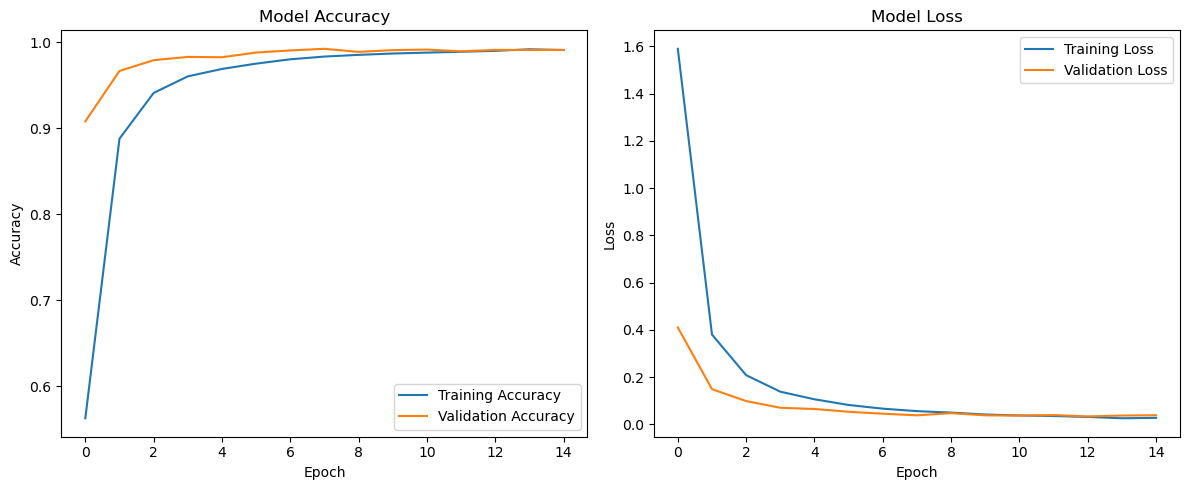

In [7]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# -------------------- Test Verilerini Yükle --------------------

test_df = pd.read_csv(os.path.join(base_dir, 'Test.csv'))

X_test = []
y_test = []

for _, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Test verileri"):
    img_path = os.path.join(base_dir, row['Path'])
    try:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (image_size, image_size))
        X_test.append(img)
        y_test.append(row['ClassId'])
    except Exception as e:
        print(f"Hata {img_path} dosyasında: {e}")

X_test = np.array(X_test) / 255.0
y_test = to_categorical(np.array(y_test), num_classes)


Test verileri: 100%|███████████████████████████████████████████████████████████| 12630/12630 [00:04<00:00, 2573.17it/s]


In [9]:
# -------------------- Test Et --------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Doğruluğu: {test_acc * 100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9538 - loss: 0.2387
Test Doğruluğu: 95.27%


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


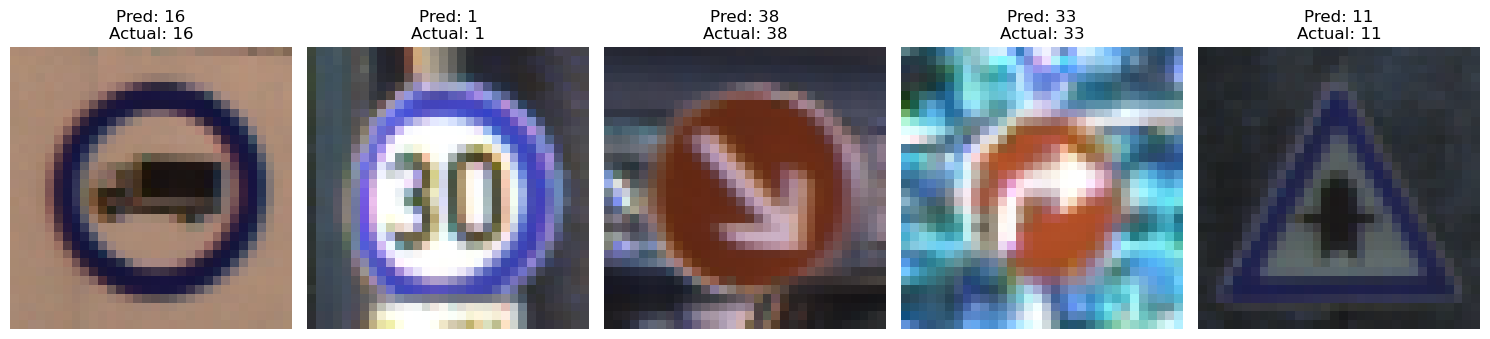

In [10]:
# -------------------- İlk 5 Tahmin ve Gerçek Değerler --------------------
import numpy as np

# Tahmin yap
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# İlk 5 tahmini ve görseli göster
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Pred: {predicted_classes[i]}\nActual: {actual_classes[i]}")
plt.tight_layout()
plt.show()


In [11]:
model.save('trafik_modeli.keras')
